In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import torch
import torchvision
import tarfile
import torchvision
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data.dataloader import DataLoader
import torch.nn as nn
from torchvision.utils import make_grid
import torchvision.models as models
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
xtrain = train_datagen.flow_from_directory('D:/Rajavarman/Documents/GitHub/IBM-Project-37872-1660358144/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=10)


Found 11386 images belonging to 9 classes.


In [6]:
data_dir='D:/Rajavarman/Documents/GitHub/IBM-Project-37872-1660358144/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set'


In [7]:
transformer = torchvision.transforms.Compose(
    [  # Applying Augmentation
        torchvision.transforms.Resize((224, 224)),
        torchvision.transforms.RandomHorizontalFlip(p=0.5),
        torchvision.transforms.RandomVerticalFlip(p=0.5),
        torchvision.transforms.RandomRotation(40),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(
            mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010]
        ),
    ]
)
database = ImageFolder(data_dir, transform=transformer)


In [8]:
xtest = train_datagen.flow_from_directory('D:/Rajavarman/Documents/GitHub/IBM-Project-37872-1660358144/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=10)


Found 3416 images belonging to 9 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [10]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten()) 
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [12]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau


In [13]:
early_stopping=EarlyStopping(monitor='val_accuracy',
                             patience=5)
reduce_lr=ReduceLROnPlateau(monitor='val_accuracy',
                            patience=5,
                            factor=0,min_lr=0.00001)
callback= [reduce_lr,early_stopping]


In [ ]:
model.fit_generator(xtrain, steps_per_epoch=len(xtrain), epochs=100,callbacks=callback,validation_data=xtest,validation_steps=len(xtest))


In [15]:
model.save('Vegetable.h5')

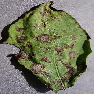

In [16]:
import numpy as np
from tensorflow.keras.preprocessing import image
img = image.load_img('D:/Rajavarman/Documents/GitHub/IBM-Project-37872-1660358144/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG',target_size=(94,94))
img

In [17]:
x = image.img_to_array(img)
x

array([[[148., 145., 152.],
        [145., 142., 149.],
        [130., 127., 134.],
        ...,
        [171., 168., 175.],
        [185., 182., 189.],
        [180., 177., 184.]],

       [[142., 139., 146.],
        [157., 154., 161.],
        [163., 160., 167.],
        ...,
        [174., 171., 178.],
        [171., 168., 175.],
        [182., 179., 186.]],

       [[132., 129., 136.],
        [134., 131., 138.],
        [149., 146., 153.],
        ...,
        [174., 171., 178.],
        [179., 176., 183.],
        [179., 176., 183.]],

       ...,

       [[144., 140., 154.],
        [134., 130., 144.],
        [136., 132., 146.],
        ...,
        [164., 161., 170.],
        [160., 159., 167.],
        [167., 165., 176.]],

       [[104., 100., 114.],
        [132., 128., 142.],
        [130., 126., 140.],
        ...,
        [159., 156., 163.],
        [155., 154., 162.],
        [161., 159., 172.]],

       [[105., 101., 115.],
        [132., 128., 142.],
        [ 99.,  

In [18]:
x = np.expand_dims(x,axis=0)
x

array([[[[148., 145., 152.],
         [145., 142., 149.],
         [130., 127., 134.],
         ...,
         [171., 168., 175.],
         [185., 182., 189.],
         [180., 177., 184.]],

        [[142., 139., 146.],
         [157., 154., 161.],
         [163., 160., 167.],
         ...,
         [174., 171., 178.],
         [171., 168., 175.],
         [182., 179., 186.]],

        [[132., 129., 136.],
         [134., 131., 138.],
         [149., 146., 153.],
         ...,
         [174., 171., 178.],
         [179., 176., 183.],
         [179., 176., 183.]],

        ...,

        [[144., 140., 154.],
         [134., 130., 144.],
         [136., 132., 146.],
         ...,
         [164., 161., 170.],
         [160., 159., 167.],
         [167., 165., 176.]],

        [[104., 100., 114.],
         [132., 128., 142.],
         [130., 126., 140.],
         ...,
         [159., 156., 163.],
         [155., 154., 162.],
         [161., 159., 172.]],

        [[105., 101., 115.],
       

In [19]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [20]:
early_stopping = EarlyStopping(monitor='val_accuracy',
                        patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                        patience=5,
                        factor=0.5,min_lr=0.00001)

callback = [reduce_lr,early_stopping]


In [22]:
img = image.load_img('D:/Rajavarman/Documents/GitHub/IBM-Project-37872-1660358144/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG',target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))

1/1 [==============================] - 0s 116ms/step
